In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.font_manager import FontProperties
#font=FontProperties(fname='C:/Windows/Fonts/msyh.ttf')
%matplotlib inline
#導入ADF函數和numpy包
import warnings
warnings.filterwarnings('ignore')
from arch.unitroot import ADF
import numpy as np
import re
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import yfinance as yf
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #中文錯誤問題

In [2]:
StockSymbol = ["1102.TW","1216.TW","1301.TW","1303.TW","1326.TW","1402.TW","2002.TW","2105.TW","2207.TW","2227.TW","2301.TW","2303.TW","2308.TW","2317.TW","2330.TW","2352.TW","2354.TW","2357.TW","2382.TW","2395.TW","2408.TW","2409.TW","2412.TW","2454.TW","2474.TW","2609.TW","2610.TW","2801.TW","2823.TW","2880.TW","2881.TW","2882.TW","2883.TW","2884.TW","2885.TW","2886.TW","2887.TW","2890.TW","2891.TW","2892.TW","2912.TW","3008.TW","3045.TW","3481.TW","3711.TW","4904.TW","4938.TW","5880.TW","6505.TW","9904.TW"]
StockName = ["TW1102","TW1216","TW1301","TW1303","TW1326","TW1402","TW2002","TW2105","TW2207","TW2227","TW2301","TW2303","TW2308","TW2317","TW2330","TW2352","TW2354","TW2357","TW2382","TW2395","TW2408","TW2409","TW2412","TW2454","TW2474","TW2609","TW2610","TW2801","TW2823","TW2880","TW2881","TW2882","TW2883","TW2884","TW2885","TW2886","TW2887","TW2890","TW2891","TW2892","TW2912","TW3008","TW3045","TW3481","TW3711","TW4904","TW4938","TW5880","TW6505","TW9904"]
StockDataList = ["TW1102","TW1216","TW1301","TW1303","TW1326","TW1402","TW2002","TW2105","TW2207","TW2227","TW2301","TW2303","TW2308","TW2317","TW2330","TW2352","TW2354","TW2357","TW2382","TW2395","TW2408","TW2409","TW2412","TW2454","TW2474","TW2609","TW2610","TW2801","TW2823","TW2880","TW2881","TW2882","TW2883","TW2884","TW2885","TW2886","TW2887","TW2890","TW2891","TW2892","TW2912","TW3008","TW3045","TW3481","TW3711","TW4904","TW4938","TW5880","TW6505","TW9904"]

In [3]:
# 定義配對形成期
formStart='2014-01-01'
formEnd='2015-07-02'
i = 0    #27 
j = 1    #39 

In [4]:
Stock1=yf.download(StockSymbol[i], start=formStart, end=formEnd ,group_by="ticker")
Stock1['ROI']=(Stock1['Close'].shift(-1)-Stock1['Close'])/Stock1['Close']*100
Stock1 = Stock1.dropna()
Stock1.index=pd.to_datetime(Stock1.index)

[*********************100%***********************]  1 of 1 completed


In [5]:
Stock2=yf.download(StockSymbol[j], start=formStart, end=formEnd ,group_by="ticker")
Stock2['ROI']=(Stock2['Close'].shift(-1)-Stock2['Close'])/Stock2['Close']*100
Stock2 = Stock2.dropna()
Stock2.index=pd.to_datetime(Stock2.index)

[*********************100%***********************]  1 of 1 completed


In [6]:
Stock1f=Stock1[formStart:formEnd]
Stock2f=Stock2[formStart:formEnd]
Stock1f.head()

,Open,High,Low,Close,Adj Close,Volume,ROI
Date,,,,,,,
2014-01-02,37.843102,37.892200,37.303902,37.352901,26.776402,1762560,-0.918540
2014-01-03,37.254902,37.303902,36.862701,37.009800,26.530451,3987180,-0.662252
2014-01-06,37.009800,37.107800,36.764702,36.764702,26.354750,3817860,0.266559
2014-01-07,36.764702,37.205898,36.764702,36.862701,26.425005,4585920,-0.132925
2014-01-08,36.960800,37.303902,36.764702,36.813702,26.389877,5349900,-0.266214


In [7]:
Stock2.head()

,Open,High,Low,Close,Adj Close,Volume,ROI
Date,,,,,,,
2014-01-02,48.711903,49.165459,48.530479,48.984035,37.881454,3404211,-0.925926
2014-01-03,48.802612,49.074745,48.349056,48.530479,37.530697,5860358,0.000000
2014-01-06,48.621189,48.802612,48.349056,48.530479,37.530697,3782334,-0.186921
2014-01-07,48.621189,48.802612,48.439766,48.439766,37.460548,4082187,-0.374526
2014-01-08,48.349056,48.711903,48.258347,48.258347,37.320244,6166825,-1.691733


<AxesSubplot:title={'center':'2015年上半年收盤價圖'}, xlabel='Date'>

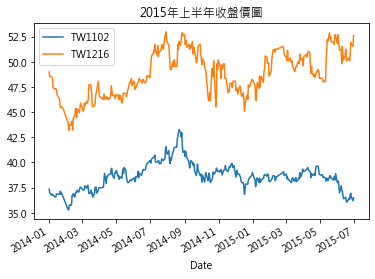

In [8]:
pairf=pd.concat([Stock1f.Close,Stock2f.Close],axis = 1)
pairf.columns = [StockName[i],StockName[j]]
pairf.plot(title='2015年上半年收盤價圖')

In [9]:
#最小距離法
def SSD(priceX,priceY):
    if priceX is None or priceY is None:
        print('缺少價格序列.')
    standardX=priceX/priceX[0]
    standardY=priceY/priceY[0]
    SSD=np.sum((standardX-standardY)**2)
    return(SSD) 

In [10]:
#計算仲琦與昆盈的標準化價格的距離
Stock1f =  pairf[StockName[i]]  
Stock2f = pairf[StockName[j]] 
dis=SSD(Stock1f,Stock2f)
dis

1.1483560997967799

In [11]:
#用ADF檢定
Stock1flog=np.log(Stock1f)
adfA=ADF(Stock1flog)
print(adfA.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.023
P-value                         0.276
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [12]:
retA=Stock1flog.diff()[1:]
adfretA=ADF(retA)
print(adfretA.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -16.693
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [13]:
Stock2flog=np.log(Stock2f)
adfB=ADF(Stock2flog)
print(adfB.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.916
P-value                         0.324
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [14]:
retB=Stock2flog.diff()[1:]
adfretB=ADF(retB)
print(adfretB.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -11.010
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Text(0.5, 1.0, 'TW1102與TW1216科技的對數價格時序圖')

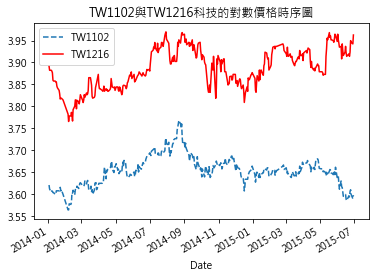

In [15]:
Stock1flog.plot(label=StockName[i],style='--')
Stock2flog.plot(label=StockName[j],style='r-')
plt.legend(loc='upper left')
plt.title(StockName[i] + '與' + StockName[j] + '科技的對數價格時序圖') 

Text(0.5, 1.0, 'TW1102與TW1216科技的對數價格差分(收益率)時序圖')

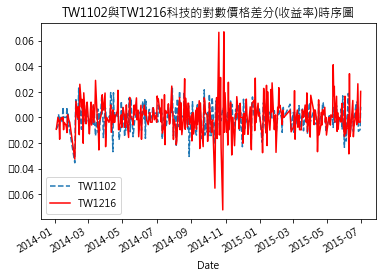

In [16]:
retA.plot(label=StockName[i],style='--')
retB.plot(label=StockName[j],style='r-')
plt.legend(loc='lower left')
plt.title(StockName[i] + '與' + StockName[j] + '科技的對數價格差分(收益率)時序圖') 

In [17]:
model=sm.OLS(Stock1flog,sm.add_constant(Stock2flog))
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TW1102   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     130.6
Date:                Fri, 21 May 2021   Prob (F-statistic):           4.99e-26
Time:                        12:03:08   Log-Likelihood:                 771.93
No. Observations:                 364   AIC:                            -1540.
Df Residuals:                     362   BIC:                            -1532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1598      0.131     16.519      0.0

In [18]:
alpha=results.params[0]  
beta=results.params[1]
print(alpha,beta)

2.159821678848175 0.38442777275004997


In [19]:
spread=Stock1flog-beta*Stock2flog-alpha
spread.head()

Date
2014-01-02   -0.035410
2014-01-03   -0.041061
2014-01-06   -0.047706
2014-01-07   -0.044325
2014-01-08   -0.044212
dtype: float64

Text(0.5, 1.0, 'TW1102與TW1216的價差序列')

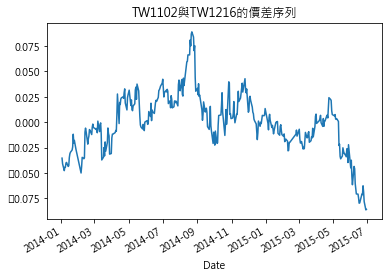

In [20]:
spread.plot()
plt.title(StockName[i] + '與' + StockName[j] +'的價差序列') 

In [21]:
adfSpread=ADF(spread, trend='nc') 
print(adfSpread.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.578
P-value                         0.108
Lags                                2
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [22]:
#最小距離法交易策略
standardA= Stock1f/Stock1f[0]
standardB= Stock2f/Stock2f[0]
SSD_pair=standardA-standardB
SSD_pair.head() 

Date
2014-01-02    0.000000
2014-01-03    0.000074
2014-01-06   -0.006488
2014-01-07   -0.002012
2014-01-08    0.000380
dtype: float64

In [23]:
meanSSD_pair=np.mean(SSD_pair)
sdSSD_pair=np.std(SSD_pair)
thresholdUp=meanSSD_pair+1.5*sdSSD_pair
thresholdDown=meanSSD_pair-1.5*sdSSD_pair
print(thresholdUp,thresholdDown)

0.09967923403239332 -0.021897294539905


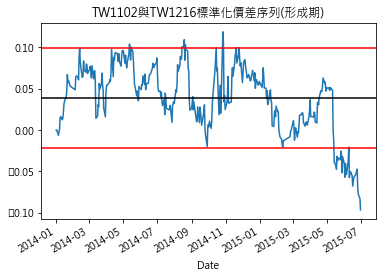

In [24]:
SSD_pair.plot()
plt.axhline(y=meanSSD_pair,color='black')
plt.axhline(y=thresholdUp,color='red')
plt.axhline(y=thresholdDown,color='red') 
plt.title(StockName[i] + '與' + StockName[j] + "標準化價差序列(形成期)") 
plt.show()


In [25]:
tradStart='2015-01-01'
tradEnd='2015-06-30'

In [26]:
Stock1t=Stock1[tradStart:tradEnd].Close
Stock2t=Stock1[tradStart:tradEnd].Close

In [27]:
def spreadCal(priceX,priceY):
    data = pd.concat([priceX,priceY],axis=1).dropna()
    data.columns=['X','Y']
    standardX=data.X/data.X[0]
    standardY=data.Y/data.Y[0]
    spread=standardX-standardY
    return(spread)

In [28]:
TradSpread=spreadCal(Stock1t,Stock2t)
TradSpread.describe() 

count    116.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

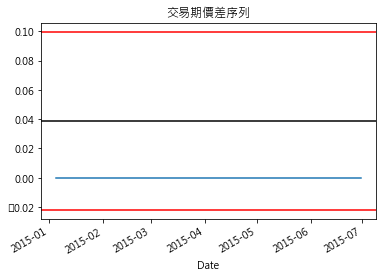

In [29]:
TradSpread.plot()
plt.title('交易期價差序列')
plt.axhline(y=meanSSD_pair,color='black')
plt.axhline(y=thresholdUp,color='red')
plt.axhline(y=thresholdDown,color='red') 

In [30]:
spreadf=Stock1flog-beta*Stock2flog-alpha
mu=np.mean(spreadf)
sd=np.std(spreadf)
mu+1.2*sd
mu-1.2*sd

-0.03482930028592036

In [31]:
CoSpreadT=np.log(Stock1t)-beta*np.log(Stock2t)-alpha
CoSpreadT.describe() 

count    116.000000
mean       0.083901
std        0.012986
min        0.046947
25%        0.080993
50%        0.086622
75%        0.091406
max        0.105540
Name: Close, dtype: float64

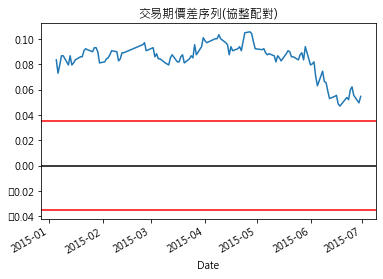

In [32]:
CoSpreadT.plot()
plt.title('交易期價差序列(協整配對)')
plt.axhline(y=mu,color='black')
plt.axhline(y=mu+1.2*sd,color='red')
plt.axhline(y=mu-1.2*sd,color='red') 

In [33]:
######PairTrading Class #############
class PairTrading:
    def SSD(self,priceX,priceY):
        if priceX is None or priceY is None:
            pass
        standardX=priceX/priceX[0]
        standardY=priceY/priceY[0]
        SSD=np.sum((standardY-standardX)**2)
        return(SSD)
    def SSDSpread(self,priceX,priceY):
        if priceX is None or priceY is None:
            pass
        standardX=priceX/priceX[0]
        standardY=priceY/priceY[0]
        spread=standardY-standardX
        return(spread)
    def cointegration(self,priceX,priceY):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        priceX=np.log(priceX)
        priceY=np.log(priceY)
        results=sm.OLS(priceY,sm.add_constant(priceX)).fit()
        resid=results.resid
        adfSpread=ADF(resid)
        if adfSpread.pvalue>=0.05:
            return(0,0,False)
        else:
            boolen = True
            print('''交易價格具有協整關係.
            P-value of ADF test: %f
            Coefficients of regression:
            Intercept: %f
            Beta: %f
             ''' % (adfSpread.pvalue, results.params[0], results.params[1]))
            return(results.params[0], results.params[1],boolen)
    def CointegrationSpread(self,priceX,priceY,
                            formStart,formEnd,tradeStart,tradeEnd):
        if priceX is None or priceY is None:
            pass
        formX=priceX[formStart:formEnd]
        formY=priceY[formStart:formEnd]
        tradeX=priceX[tradeStart:tradeEnd]
        tradeY=priceY[tradeStart:tradeEnd]
        coefficients=self.cointegration(formX,formY)
        if coefficients is None:
                pass
        else:
            spread=(np.log(tradeY)
            -coefficients[0]-coefficients[1]*np.log(tradeX))
            return(spread)
    def calBound(self,priceX,priceY,method,formStart,formEnd,width=1.5):
        formX=priceX[formStart:formEnd]
        formY=priceY[formStart:formEnd]
        if method=='SSD':
            spread=self.SSDSpread(formX,formY)            
            mu=np.mean(spread)
            sd=np.std(spread)
            UpperBound=mu+width*sd
            LowerBound=mu-width*sd
            return(UpperBound,LowerBound)
        elif method=='Cointegration':
            spread=self.CointegrationSpread(priceX,priceY,formStart,formEnd,
                 formStart,formEnd)
            mu=np.mean(spread)
            sd=np.std(spread)
            UpperBound=mu+width*sd
            LowerBound=mu-width*sd
            return(UpperBound,LowerBound)
        else:
            pass

In [34]:
formStart = '2014-01-01'
formEnd = '2014-12-31'
tradeStart = '2015-01-01'
tradeEnd = '2015-06-30'

In [35]:
priceA= Stock2.Close
priceB=Stock1.Close
priceAf=priceA[formStart:formEnd]
priceBf=priceB[formStart:formEnd]
priceAt=priceA[tradeStart:tradeEnd]
priceBt=priceB[tradeStart:tradeEnd]

In [36]:
pt=PairTrading()
SSD=pt.SSD(priceAf,priceBf)
SSD

0.9703229133988771

In [37]:
SSDspread=pt.SSDSpread(priceAf,priceBf)
SSDspread.describe()
SSDspread.head()

Date
2014-01-02    0.000000
2014-01-03    0.000074
2014-01-06   -0.006488
2014-01-07   -0.002012
2014-01-08    0.000380
Name: Close, dtype: float64

In [38]:
coefficients=pt.cointegration(priceAf,priceBf)
coefficients

交易價格具有協整關係.
            P-value of ADF test: 0.000529
            Coefficients of regression:
            Intercept: 1.141179
            Beta: 0.649753
             


(1.1411787396233803, 0.6497528163860999, True)

In [39]:
CoSpreadF=pt.CointegrationSpread(priceA,priceB,formStart,formEnd,formStart,formEnd)
CoSpreadF.head()

交易價格具有協整關係.
            P-value of ADF test: 0.000529
            Coefficients of regression:
            Intercept: 1.141179
            Beta: 0.649753
             


Date
2014-01-02   -0.049278
2014-01-03   -0.052461
2014-01-06   -0.059106
2014-01-07   -0.055228
2014-01-08   -0.054120
Name: Close, dtype: float64

In [40]:
CoSpreadTr=pt.CointegrationSpread(priceA,priceB,formStart,formEnd,tradeStart,tradeEnd)
CoSpreadTr.describe()

交易價格具有協整關係.
            P-value of ADF test: 0.000529
            Coefficients of regression:
            Intercept: 1.141179
            Beta: 0.649753
             


count    116.000000
mean      -0.038972
std        0.030544
min       -0.118605
25%       -0.057569
50%       -0.033967
75%       -0.014630
max        0.010972
Name: Close, dtype: float64

In [41]:
bound=pt.calBound(priceA,priceB,'Cointegration',formStart,formEnd,width=1.2)
bound

交易價格具有協整關係.
            P-value of ADF test: 0.000529
            Coefficients of regression:
            Intercept: 1.141179
            Beta: 0.649753
             


(0.027684287823746472, -0.027684287823664517)

In [42]:
mu=np.mean(CoSpreadF)
sd=np.std(CoSpreadF)

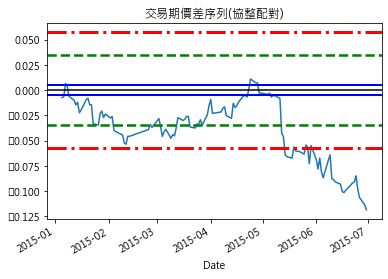

In [43]:
#設定交易期
CoSpreadTr.plot()
plt.title('交易期價差序列(協整配對)')
plt.axhline(y=mu,color='black')
plt.axhline(y=mu+0.2*sd,color='blue',ls='-',lw=2)
plt.axhline(y=mu-0.2*sd,color='blue',ls='-',lw=2)
plt.axhline(y=mu+1.5*sd,color='green',ls='--',lw=2.5)
plt.axhline(y=mu-1.5*sd,color='green',ls='--',lw=2.5)
plt.axhline(y=mu+2.5*sd,color='red',ls='-.',lw=3) 
plt.axhline(y=mu-2.5*sd,color='red',ls='-.',lw=3) 

In [44]:
level=(float('-inf'),mu-2.5*sd,
    mu-1.5*sd,mu-0.2*sd,
    mu+0.2*sd,mu+1.5*sd,
    mu+2.5*sd,
    float('inf'))

In [45]:
prcLevel=pd.cut(CoSpreadTr,level,labels=False)-3
prcLevel.head() 

Date
2015-01-05   -1
2015-01-06   -1
2015-01-07    1
2015-01-08    0
2015-01-09   -1
Name: Close, dtype: int64

In [46]:
#模擬交易
def TradeSig(prcLevel):
    n=len(prcLevel)
    signal=np.zeros(n)
    for i in range(1,n):
        if prcLevel[i-1]==1 and prcLevel[i]==2:
            signal[i]=-2
        elif prcLevel[i-1]==1 and prcLevel[i]==0:
            signal[i]=2
        elif prcLevel[i-1]==2 and prcLevel[i]==3:
            signal[i]=3
        elif prcLevel[i-1]==-1 and prcLevel[i]==-2:
            signal[i]=1
        elif prcLevel[i-1]==-1 and prcLevel[i]==0:
            signal[i]=-1
        elif prcLevel[i-1]==-2 and prcLevel[i]==-3:
            signal[i]=-3
    return(signal)

In [47]:
signal=TradeSig(prcLevel)
print(signal)

[ 0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.
  0.  2.  0.  0.  0.  0.  0.  0.  0.  1.  0. -3.  0.  0.  0. -3.  0.  0.
  0.  0.  0. -3.  0. -3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]


In [48]:
position=[signal[0]]
ns=len(signal)

In [49]:
for i in range(1,ns):
    position.append(position[-1])
    if signal[i]==1:
        position[i]=1
    elif signal[i]==-2:
        position[i]=-1
    elif signal[i]==-1 and position[i-1]==1:
        position[i]=0
    elif signal[i]==2 and position[i-1]==-1:
        position[i]=0
    elif signal[i]==3:
        position[i]=0
    elif signal[i]==-3:
        position[i]=0

In [50]:
position=pd.Series(position,index=CoSpreadT.index)
position.tail() 

Date
2015-06-24    0.0
2015-06-25    0.0
2015-06-26    0.0
2015-06-29    0.0
2015-06-30    0.0
dtype: float64

In [51]:
def TradeSim(priceX,priceY,position):
    n=len(position)
    shareY=10000*position
    shareX=[(-beta)*shareY[0]*priceY[0]/priceX[0]]
    cash=[10000]
    for i in range(1,n):
        shareX.append(shareX[i-1])
        cash.append(cash[i-1])
        if position[i-1]==0 and position[i]==1:
            shareX[i]=(-beta)*shareY[i]*priceY[i]/priceX[i]
            cash[i]=cash[i-1]-(shareY[i]*priceY[i]+shareX[i]*priceX[i])
        elif position[i-1]==0 and position[i]==-1:
            shareX[i]=(-beta)*shareY[i]*priceY[i]/priceX[i]
            cash[i]=cash[i-1]-(shareY[i]*priceY[i]+shareX[i]*priceX[i])
        elif position[i-1]==1 and position[i]==0:
            shareX[i]=0
            cash[i]=cash[i-1]+(shareY[i-1]*priceY[i]+shareX[i-1]*priceX[i])
        elif position[i-1]==-1 and position[i]==0:
            shareX[i]=0
            cash[i]=cash[i-1]+(shareY[i-1]*priceY[i]+shareX[i-1]*priceX[i])
    cash = pd.Series(cash,index=position.index)
    shareY=pd.Series(shareY,index=position.index)
    shareX=pd.Series(shareX,index=position.index)
    asset=cash+shareY*priceY+shareX*priceX
    account=pd.DataFrame({'Position':position,'ShareY':shareY,'ShareX':shareX,'Cash':cash,'Asset':asset})
    return(account)

In [52]:
account1=TradeSim(Stock2t,Stock1t,position)
account1.tail() 
account1.loc['2015-06-30','Asset']

14308.986804976099

Text(0, 0.5, 'asset')

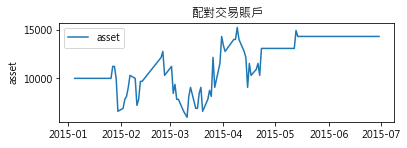

In [53]:
plt.subplot(211)
plt.plot(account1.Asset,label='asset')
plt.title('配對交易賬戶') 
plt.legend()
plt.ylabel('asset')

---

<font size=6>**以下是50支股票所有可配對的所有可能性**</font>

In [55]:
formStart='2014-01-01'
formEnd='2015-07-02'
txtarry = []
for i in range (len(StockSymbol)):
    formStart='2014-01-01'
    formEnd='2015-07-02'
    Stock1=yf.download(StockSymbol[i], start=formStart, end=formEnd ,group_by="ticker")
    Stock1['ROI']=(Stock1['Close'].shift(-1)-Stock1['Close'])/Stock1['Close']*100
    Stock1 = Stock1.dropna()
    Stock1.index=pd.to_datetime(Stock1.index)
    for j in range (i+1,len(StockSymbol)):
        formStart='2014-01-01'
        formEnd='2015-07-02'
        Stock2=yf.download(StockSymbol[j], start=formStart, end=formEnd ,group_by="ticker")
        Stock2['ROI']=(Stock2['Close'].shift(-1)-Stock2['Close'])/Stock2['Close']*100
        Stock2 = Stock2.dropna()
        Stock2.index=pd.to_datetime(Stock2.index)
        
        Stock1f=Stock1[formStart:formEnd]
        Stock2f=Stock2[formStart:formEnd]
        
        pairf=pd.concat([Stock1f.Close,Stock2f.Close],axis = 1)
        pairf.columns = [StockName[i],StockName[j]]
        
        Stock1f =  pairf[StockName[i]]  
        Stock2f = pairf[StockName[j]] 
        standardX=Stock1f/Stock1f[0]
        standardY=Stock2f/Stock2f[0]
        dis=np.sum((standardX-standardY)**2)
#         dis=SSD(Stock1f,Stock2f)
        
        Stock1flog=np.log(Stock1f)
        adfA=ADF(Stock1flog)
        
        retA=Stock1flog.diff()[1:]
        adfretA=ADF(retA)
        
        Stock2flog=np.log(Stock2f)
        adfB=ADF(Stock2flog)
        
        retB=Stock2flog.diff()[1:]
        adfretB=ADF(retB)
        
        Stock1flog = Stock1flog.dropna()
        Stock2flog = Stock2flog.dropna()
        
        model=sm.OLS(Stock1flog,sm.add_constant(Stock2flog))
        results=model.fit()
        
        alpha=results.params[0]  
        beta=results.params[1]

        spread=Stock1flog-beta*Stock2flog-alpha

        adfSpread=ADF(spread, trend='nc') 

        standardA= Stock1f/Stock1f[0]
        standardB= Stock2f/Stock2f[0]
        SSD_pair=standardA-standardB

        meanSSD_pair=np.mean(SSD_pair)
        sdSSD_pair=np.std(SSD_pair)
        thresholdUp=meanSSD_pair+1.5*sdSSD_pair
        thresholdDown=meanSSD_pair-1.5*sdSSD_pair
        
        tradStart='2015-01-01'
        tradEnd='2015-06-30'
        
        Stock1t=Stock1[tradStart:tradEnd].Close
        Stock2t=Stock1[tradStart:tradEnd].Close
        
        data = pd.concat([Stock1t,Stock2t],axis=1).dropna()
        data.columns=['X','Y']
        standardX=data.X/data.X[0]
        standardY=data.Y/data.Y[0]
        TradSpread=standardX-standardY
        

        spreadf=Stock1flog-beta*Stock2flog-alpha
        mu=np.mean(spreadf)
        sd=np.std(spreadf)

        CoSpreadT=np.log(Stock1t)-beta*np.log(Stock2t)-alpha
        
        formStart = '2014-01-01'
        formEnd = '2014-12-31'
        tradeStart = '2015-01-01'
        tradeEnd = '2015-06-30'

        priceA= Stock2.Close
        priceB=Stock1.Close
        priceAf=priceA[formStart:formEnd]
        priceBf=priceB[formStart:formEnd]
        priceAt=priceA[tradeStart:tradeEnd]
        priceBt=priceB[tradeStart:tradeEnd]

        pt=PairTrading()
        SSD=pt.SSD(priceAf,priceBf)

        SSDspread=pt.SSDSpread(priceAf,priceBf)
            
        print(str(StockName[i] + "與" + StockName[j] + "："))    
            
        coefficients=pt.cointegration(priceAf,priceBf)
        
        CoSpreadF=pt.CointegrationSpread(priceA,priceB,formStart,formEnd,formStart,formEnd)

        CoSpreadTr=pt.CointegrationSpread(priceA,priceB,formStart,formEnd,tradeStart,tradeEnd)
        
        bound=pt.calBound(priceA,priceB,'Cointegration',formStart,formEnd,width=1.2)
        
        if (coefficients[2] == True):
            mu=np.mean(CoSpreadF)
            sd=np.std(CoSpreadF)

            level=(float('-inf'),mu-2.5*sd,
                mu-1.5*sd,mu-0.2*sd,
                mu+0.2*sd,mu+1.5*sd,
                mu+2.5*sd,
                float('inf'))

            prcLevel=pd.cut(CoSpreadTr,level,labels=False)-3

            signal=TradeSig(prcLevel)

            position=[signal[0]]
            ns=len(signal)

            for g in range(1,ns):
                position.append(position[-1])
                if signal[g]==1:
                    position[g]=1
                elif signal[g]==-2:
                    position[g]=-1
                elif signal[g]==-1 and position[g-1]==1:
                    position[g]=0
                elif signal[g]==2 and position[g-1]==-1:
                    position[g]=0
                elif signal[g]==3:
                    position[g]=0
                elif signal[g]==-3:
                    position[g]=0

            position=pd.Series(position,index=CoSpreadT.index)

            account1=TradeSim(Stock2t,Stock1t,position)
            account1.tail() 
            print(str(StockName[i]) + "與" + str(StockName[j]) + "：" + str(account1.loc['2015-06-30','Asset']))
            txtarry.append(str(StockName[i]) + "與" + str(StockName[j]) + "：" + str(account1.loc['2015-06-30','Asset']))
        else:
            pass

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
TW1102與TW1216：
交易價格具有協整關係.
            P-value of ADF test: 0.000529
            Coefficients of regression:
            Intercept: 1.141179
            Beta: 0.649753
             
交易價格具有協整關係.
            P-value of ADF test: 0.000529
            Coefficients of regression:
            Intercept: 1.141179
            Beta: 0.649753
             
交易價格具有協整關係.
            P-value of ADF test: 0.000529
            Coefficients of regression:
            Intercept: 1.141179
            Beta: 0.649753
             
交易價格具有協整關係.
            P-value of ADF test: 0.000529
            Coefficients of regression:
            Intercept: 1.141179
            Beta: 0.649753
             
TW1102與TW1216：14308.986804976099
[*********************100%***********************]  1 of 1 completed
TW1102與TW1301：
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
TW1216與TW2409：
[*********************100%***********************]  1 of 1 completed
TW1216與TW2412：
[*********************100%***********************]  1 of 1 completed
TW1216與TW2454：
[*********************100%***********************]  1 of 1 completed
TW1216與TW2474：
交易價格具有協整關係.
            P-value of ADF test: 0.016576
            Coefficients of regression:
            Intercept: 2.389814
            Beta: 0.268036
             
交易價格具有協整關係.
            P-value of ADF test: 0.016576
            Coefficients of regression:
            Intercept: 2.389814
            Beta: 0.268036
             
交易價格具有協整關係.
            P-value of ADF test: 0.016576
            Coefficients of regression:
            Intercept: 2.389814
            Beta: 0.268036
             
交易價格具有協整關係.
            P-value of ADF test: 0.016576
            Coefficients of regression:
            Intercept: 2.389814
            Beta: 0.268036
          

[*********************100%***********************]  1 of 1 completed
TW1301與TW2105：
[*********************100%***********************]  1 of 1 completed
TW1301與TW2207：
交易價格具有協整關係.
            P-value of ADF test: 0.004077
            Coefficients of regression:
            Intercept: 6.321908
            Beta: -0.335783
             
交易價格具有協整關係.
            P-value of ADF test: 0.004077
            Coefficients of regression:
            Intercept: 6.321908
            Beta: -0.335783
             
交易價格具有協整關係.
            P-value of ADF test: 0.004077
            Coefficients of regression:
            Intercept: 6.321908
            Beta: -0.335783
             
交易價格具有協整關係.
            P-value of ADF test: 0.004077
            Coefficients of regression:
            Intercept: 6.321908
            Beta: -0.335783
             
TW1301與TW2207：-49337.97153245041
[*********************100%***********************]  1 of 1 completed
TW1301與TW2227：
[*********************100%*****************

[*********************100%***********************]  1 of 1 completed
TW1326與TW2303：
[*********************100%***********************]  1 of 1 completed
TW1326與TW2308：
[*********************100%***********************]  1 of 1 completed
TW1326與TW2317：
[*********************100%***********************]  1 of 1 completed
TW1326與TW2330：
交易價格具有協整關係.
            P-value of ADF test: 0.003877
            Coefficients of regression:
            Intercept: 6.715033
            Beta: -0.506501
             
交易價格具有協整關係.
            P-value of ADF test: 0.003877
            Coefficients of regression:
            Intercept: 6.715033
            Beta: -0.506501
             
交易價格具有協整關係.
            P-value of ADF test: 0.003877
            Coefficients of regression:
            Intercept: 6.715033
            Beta: -0.506501
             
交易價格具有協整關係.
            P-value of ADF test: 0.003877
            Coefficients of regression:
            Intercept: 6.715033
            Beta: -0.506501
      

             
交易價格具有協整關係.
            P-value of ADF test: 0.038771
            Coefficients of regression:
            Intercept: 5.771445
            Beta: -0.556853
             
交易價格具有協整關係.
            P-value of ADF test: 0.038771
            Coefficients of regression:
            Intercept: 5.771445
            Beta: -0.556853
             
TW1326與TW2892：32456.47372101806
[*********************100%***********************]  1 of 1 completed
TW1326與TW2912：
交易價格具有協整關係.
            P-value of ADF test: 0.027293
            Coefficients of regression:
            Intercept: 6.539594
            Beta: -0.418090
             
交易價格具有協整關係.
            P-value of ADF test: 0.027293
            Coefficients of regression:
            Intercept: 6.539594
            Beta: -0.418090
             
交易價格具有協整關係.
            P-value of ADF test: 0.027293
            Coefficients of regression:
            Intercept: 6.539594
            Beta: -0.418090
             
交易價格具有協整關係.
            P-valu

交易價格具有協整關係.
            P-value of ADF test: 0.035150
            Coefficients of regression:
            Intercept: 3.201782
            Beta: 0.086250
             
TW1402與TW2303：15212.869784208968
[*********************100%***********************]  1 of 1 completed
TW1402與TW2308：
交易價格具有協整關係.
            P-value of ADF test: 0.002970
            Coefficients of regression:
            Intercept: 2.707666
            Beta: 0.137371
             
交易價格具有協整關係.
            P-value of ADF test: 0.002970
            Coefficients of regression:
            Intercept: 2.707666
            Beta: 0.137371
             
交易價格具有協整關係.
            P-value of ADF test: 0.002970
            Coefficients of regression:
            Intercept: 2.707666
            Beta: 0.137371
             
交易價格具有協整關係.
            P-value of ADF test: 0.002970
            Coefficients of regression:
            Intercept: 2.707666
            Beta: 0.137371
             
TW1402與TW2308：-1378.0534918175545
[*************

交易價格具有協整關係.
            P-value of ADF test: 0.012632
            Coefficients of regression:
            Intercept: 3.925928
            Beta: -0.110363
             
TW1402與TW2412：11693.753846244945
[*********************100%***********************]  1 of 1 completed
TW1402與TW2454：
交易價格具有協整關係.
            P-value of ADF test: 0.029345
            Coefficients of regression:
            Intercept: 2.781904
            Beta: 0.104763
             
交易價格具有協整關係.
            P-value of ADF test: 0.029345
            Coefficients of regression:
            Intercept: 2.781904
            Beta: 0.104763
             
交易價格具有協整關係.
            P-value of ADF test: 0.029345
            Coefficients of regression:
            Intercept: 2.781904
            Beta: 0.104763
             
交易價格具有協整關係.
            P-value of ADF test: 0.029345
            Coefficients of regression:
            Intercept: 2.781904
            Beta: 0.104763
             
TW1402與TW2454：5247.19643044081
[***************

[*********************100%***********************]  1 of 1 completed
TW1402與TW2885：
交易價格具有協整關係.
            P-value of ADF test: 0.020725
            Coefficients of regression:
            Intercept: 2.203606
            Beta: 0.456717
             
交易價格具有協整關係.
            P-value of ADF test: 0.020725
            Coefficients of regression:
            Intercept: 2.203606
            Beta: 0.456717
             
交易價格具有協整關係.
            P-value of ADF test: 0.020725
            Coefficients of regression:
            Intercept: 2.203606
            Beta: 0.456717
             
交易價格具有協整關係.
            P-value of ADF test: 0.020725
            Coefficients of regression:
            Intercept: 2.203606
            Beta: 0.456717
             
TW1402與TW2885：22637.59704346565
[*********************100%***********************]  1 of 1 completed
TW1402與TW2886：
交易價格具有協整關係.
            P-value of ADF test: 0.008136
            Coefficients of regression:
            Intercept: 1.767439
      

交易價格具有協整關係.
            P-value of ADF test: 0.011035
            Coefficients of regression:
            Intercept: 3.747729
            Beta: -0.077406
             
交易價格具有協整關係.
            P-value of ADF test: 0.011035
            Coefficients of regression:
            Intercept: 3.747729
            Beta: -0.077406
             
TW1402與TW4904：946.2090028843741
[*********************100%***********************]  1 of 1 completed
TW1402與TW4938：
交易價格具有協整關係.
            P-value of ADF test: 0.015617
            Coefficients of regression:
            Intercept: 3.437967
            Beta: -0.003092
             
交易價格具有協整關係.
            P-value of ADF test: 0.015617
            Coefficients of regression:
            Intercept: 3.437967
            Beta: -0.003092
             
交易價格具有協整關係.
            P-value of ADF test: 0.015617
            Coefficients of regression:
            Intercept: 3.437967
            Beta: -0.003092
             
交易價格具有協整關係.
            P-value of ADF test:

[*********************100%***********************]  1 of 1 completed
TW2105與TW9904：
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
TW2207與TW2227：
[*********************100%***********************]  1 of 1 completed
TW2207與TW2301：
[*********************100%***********************]  1 of 1 completed
TW2207與TW2303：
[*********************100%***********************]  1 of 1 completed
TW2207與TW2308：
[*********************100%***********************]  1 of 1 completed
TW2207與TW2317：
[*********************100%***********************]  1 of 1 completed
TW2207與TW2330：
[*********************100%***********************]  1 of 1 completed
TW2207與TW2352：
[*********************100%***********************]  1 of 1 completed
TW2207與TW2354：
交易價格具有協整關係.
            P-value of ADF test: 0.045767
            Coefficients of regression:
            Intercept: 1.598782
            Beta: 1.027073
             
交易價格具有協整

[*********************100%***********************]  1 of 1 completed
TW2227與TW2882：
交易價格具有協整關係.
            P-value of ADF test: 0.012476
            Coefficients of regression:
            Intercept: 9.563939
            Beta: -0.967450
             
交易價格具有協整關係.
            P-value of ADF test: 0.012476
            Coefficients of regression:
            Intercept: 9.563939
            Beta: -0.967450
             
交易價格具有協整關係.
            P-value of ADF test: 0.012476
            Coefficients of regression:
            Intercept: 9.563939
            Beta: -0.967450
             
交易價格具有協整關係.
            P-value of ADF test: 0.012476
            Coefficients of regression:
            Intercept: 9.563939
            Beta: -0.967450
             
TW2227與TW2882：349982.788166102
[*********************100%***********************]  1 of 1 completed
TW2227與TW2883：
[*********************100%***********************]  1 of 1 completed
TW2227與TW2884：
交易價格具有協整關係.
            P-value of ADF test: 

[*********************100%***********************]  1 of 1 completed
TW2308與TW3045：
[*********************100%***********************]  1 of 1 completed
TW2308與TW3481：
[*********************100%***********************]  1 of 1 completed
TW2308與TW3711：
[*********************100%***********************]  1 of 1 completed
TW2308與TW4904：
[*********************100%***********************]  1 of 1 completed
TW2308與TW4938：
[*********************100%***********************]  1 of 1 completed
TW2308與TW5880：
[*********************100%***********************]  1 of 1 completed
TW2308與TW6505：
[*********************100%***********************]  1 of 1 completed
TW2308與TW9904：
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
TW2317與TW2330：
[*********************100%***********************]  1 of 1 completed
TW2317與TW2352：
[*********************100%***********************]  1 of 1 completed
TW2317與TW2354：
[******

[*********************100%***********************]  1 of 1 completed
TW2352與TW2881：
交易價格具有協整關係.
            P-value of ADF test: 0.014151
            Coefficients of regression:
            Intercept: -5.332588
            Beta: 2.049129
             
交易價格具有協整關係.
            P-value of ADF test: 0.014151
            Coefficients of regression:
            Intercept: -5.332588
            Beta: 2.049129
             
交易價格具有協整關係.
            P-value of ADF test: 0.014151
            Coefficients of regression:
            Intercept: -5.332588
            Beta: 2.049129
             
交易價格具有協整關係.
            P-value of ADF test: 0.014151
            Coefficients of regression:
            Intercept: -5.332588
            Beta: 2.049129
             
TW2352與TW2881：9633.772644233992
[*********************100%***********************]  1 of 1 completed
TW2352與TW2882：
交易價格具有協整關係.
            P-value of ADF test: 0.003065
            Coefficients of regression:
            Intercept: -6.055975
 

[*********************100%***********************]  1 of 1 completed
TW2357與TW4938：
交易價格具有協整關係.
            P-value of ADF test: 0.039296
            Coefficients of regression:
            Intercept: 4.784357
            Beta: 0.239116
             
交易價格具有協整關係.
            P-value of ADF test: 0.039296
            Coefficients of regression:
            Intercept: 4.784357
            Beta: 0.239116
             
交易價格具有協整關係.
            P-value of ADF test: 0.039296
            Coefficients of regression:
            Intercept: 4.784357
            Beta: 0.239116
             
交易價格具有協整關係.
            P-value of ADF test: 0.039296
            Coefficients of regression:
            Intercept: 4.784357
            Beta: 0.239116
             
TW2357與TW4938：-25818.089892470278
[*********************100%***********************]  1 of 1 completed
TW2357與TW5880：
[*********************100%***********************]  1 of 1 completed
TW2357與TW6505：
[*********************100%********************

[*********************100%***********************]  1 of 1 completed
TW2382與TW9904：
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
TW2395與TW2408：
交易價格具有協整關係.
            P-value of ADF test: 0.033841
            Coefficients of regression:
            Intercept: 3.583689
            Beta: 0.374085
             
交易價格具有協整關係.
            P-value of ADF test: 0.033841
            Coefficients of regression:
            Intercept: 3.583689
            Beta: 0.374085
             
交易價格具有協整關係.
            P-value of ADF test: 0.033841
            Coefficients of regression:
            Intercept: 3.583689
            Beta: 0.374085
             
交易價格具有協整關係.
            P-value of ADF test: 0.033841
            Coefficients of regression:
            Intercept: 3.583689
            Beta: 0.374085
             
TW2395與TW2408：60041.11508843023
[*********************100%***********************]  1 of 1 comp

[*********************100%***********************]  1 of 1 completed
TW2454與TW2609：
[*********************100%***********************]  1 of 1 completed
TW2454與TW2610：
[*********************100%***********************]  1 of 1 completed
TW2454與TW2801：
[*********************100%***********************]  1 of 1 completed
TW2454與TW2823：
[*********************100%***********************]  1 of 1 completed
TW2454與TW2880：
[*********************100%***********************]  1 of 1 completed
TW2454與TW2881：
[*********************100%***********************]  1 of 1 completed
TW2454與TW2882：
[*********************100%***********************]  1 of 1 completed
TW2454與TW2883：
[*********************100%***********************]  1 of 1 completed
TW2454與TW2884：
[*********************100%***********************]  1 of 1 completed
TW2454與TW2885：
[*********************100%***********************]  1 of 1 completed
TW2454與TW2886：
[*********************100%***********************]  1 of 1 completed
TW2454與

[*********************100%***********************]  1 of 1 completed
TW2801與TW2892：
交易價格具有協整關係.
            P-value of ADF test: 0.005791
            Coefficients of regression:
            Intercept: 1.059115
            Beta: 0.583515
             
交易價格具有協整關係.
            P-value of ADF test: 0.005791
            Coefficients of regression:
            Intercept: 1.059115
            Beta: 0.583515
             
交易價格具有協整關係.
            P-value of ADF test: 0.005791
            Coefficients of regression:
            Intercept: 1.059115
            Beta: 0.583515
             
交易價格具有協整關係.
            P-value of ADF test: 0.005791
            Coefficients of regression:
            Intercept: 1.059115
            Beta: 0.583515
             
TW2801與TW2892：14829.11058757933
[*********************100%***********************]  1 of 1 completed
TW2801與TW2912：
[*********************100%***********************]  1 of 1 completed
TW2801與TW3008：
交易價格具有協整關係.
            P-value of ADF test: 0.0

[*********************100%***********************]  1 of 1 completed
TW2823與TW2884：
交易價格具有協整關係.
            P-value of ADF test: 0.037365
            Coefficients of regression:
            Intercept: 2.330737
            Beta: 0.237043
             
交易價格具有協整關係.
            P-value of ADF test: 0.037365
            Coefficients of regression:
            Intercept: 2.330737
            Beta: 0.237043
             
交易價格具有協整關係.
            P-value of ADF test: 0.037365
            Coefficients of regression:
            Intercept: 2.330737
            Beta: 0.237043
             
交易價格具有協整關係.
            P-value of ADF test: 0.037365
            Coefficients of regression:
            Intercept: 2.330737
            Beta: 0.237043
             
TW2823與TW2884：10000.0
[*********************100%***********************]  1 of 1 completed
TW2823與TW2885：
交易價格具有協整關係.
            P-value of ADF test: 0.033259
            Coefficients of regression:
            Intercept: 1.128383
            Beta

交易價格具有協整關係.
            P-value of ADF test: 0.026425
            Coefficients of regression:
            Intercept: 2.713948
            Beta: 0.075853
             
交易價格具有協整關係.
            P-value of ADF test: 0.026425
            Coefficients of regression:
            Intercept: 2.713948
            Beta: 0.075853
             
TW2823與TW3481：10000.0
[*********************100%***********************]  1 of 1 completed
TW2823與TW3711：
交易價格具有協整關係.
            P-value of ADF test: 0.044413
            Coefficients of regression:
            Intercept: 3.213777
            Beta: -0.072483
             
交易價格具有協整關係.
            P-value of ADF test: 0.044413
            Coefficients of regression:
            Intercept: 3.213777
            Beta: -0.072483
             
交易價格具有協整關係.
            P-value of ADF test: 0.044413
            Coefficients of regression:
            Intercept: 3.213777
            Beta: -0.072483
             
交易價格具有協整關係.
            P-value of ADF test: 0.044413
  

交易價格具有協整關係.
            P-value of ADF test: 0.023718
            Coefficients of regression:
            Intercept: -1.923285
            Beta: 1.647280
             
交易價格具有協整關係.
            P-value of ADF test: 0.023718
            Coefficients of regression:
            Intercept: -1.923285
            Beta: 1.647280
             
TW2883與TW5880：10000.0
[*********************100%***********************]  1 of 1 completed
TW2883與TW6505：
[*********************100%***********************]  1 of 1 completed
TW2883與TW9904：
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
TW2884與TW2885：
[*********************100%***********************]  1 of 1 completed
TW2884與TW2886：
[*********************100%***********************]  1 of 1 completed
TW2884與TW2887：
[*********************100%***********************]  1 of 1 completed
TW2884與TW2890：
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
TW2885與TW3045：
交易價格具有協整關係.
            P-value of ADF test: 0.005883
            Coefficients of regression:
            Intercept: 4.209921
            Beta: -0.337144
             
交易價格具有協整關係.
            P-value of ADF test: 0.005883
            Coefficients of regression:
            Intercept: 4.209921
            Beta: -0.337144
             
交易價格具有協整關係.
            P-value of ADF test: 0.005883
            Coefficients of regression:
            Intercept: 4.209921
            Beta: -0.337144
             
交易價格具有協整關係.
            P-value of ADF test: 0.005883
            Coefficients of regression:
            Intercept: 4.209921
            Beta: -0.337144
             
TW2885與TW3045：-833.1211688439944
[*********************100%***********************]  1 of 1 completed
TW2885與TW3481：
交易價格具有協整關係.
            P-value of ADF test: 0.023263
            Coefficients of regression:
            Intercept: 2.609385
 

[*********************100%***********************]  1 of 1 completed
TW2886與TW6505：
[*********************100%***********************]  1 of 1 completed
TW2886與TW9904：
交易價格具有協整關係.
            P-value of ADF test: 0.025702
            Coefficients of regression:
            Intercept: 3.825420
            Beta: -0.175900
             
交易價格具有協整關係.
            P-value of ADF test: 0.025702
            Coefficients of regression:
            Intercept: 3.825420
            Beta: -0.175900
             
交易價格具有協整關係.
            P-value of ADF test: 0.025702
            Coefficients of regression:
            Intercept: 3.825420
            Beta: -0.175900
             
交易價格具有協整關係.
            P-value of ADF test: 0.025702
            Coefficients of regression:
            Intercept: 3.825420
            Beta: -0.175900
             
TW2886與TW9904：4508.323571688175
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 

In [56]:
txtarry

['TW1102與TW1216：14308.986804976099',
 'TW1102與TW2308：17733.686192782247',
 'TW1102與TW2317：8801.12635204551',
 'TW1102與TW2395：4702.230627366225',
 'TW1102與TW2454：20282.660275439383',
 'TW1102與TW2474：9529.233927255846',
 'TW1102與TW2801：10216.2257089981',
 'TW1102與TW2880：18057.04068729875',
 'TW1102與TW3008：7132.052733279124',
 'TW1102與TW3711：11807.842394165054',
 'TW1102與TW5880：5972.640325278044',
 'TW1102與TW9904：20175.26032107399',
 'TW1216與TW2308：3615.5819332276587',
 'TW1216與TW2317：30720.313918538537',
 'TW1216與TW2395：31349.64993571263',
 'TW1216與TW2474：23998.74497092323',
 'TW1216與TW2880：986593.5559825662',
 'TW1216與TW2886：773.1732330968371',
 'TW1216與TW2887：-17892.211237975687',
 'TW1216與TW3008：69700.07270422095',
 'TW1216與TW5880：-1064239.5533684744',
 'TW1216與TW9904：-18739.88945463352',
 'TW1301與TW2002：96629.91677213216',
 'TW1301與TW2207：-49337.97153245041',
 'TW1301與TW2354：-13229.309840775793',
 'TW1301與TW2382：87585.28211763571',
 'TW1301與TW2609：-17236.664772259537',
 'TW1301與TW261